In [1]:
using Pkg
Pkg.activate("../Project.toml")

using ITensors
using Plots
using Random
using Interpolations
using LegendrePolynomials
using Distributions
# using ClassicalOrthogonalPolynomials
using Integrals
using KernelDensity
include("RealRealHighDimension.jl")


  Activating project at `~/Documents/QML Project/QuantumInspiredML`


fitMPS

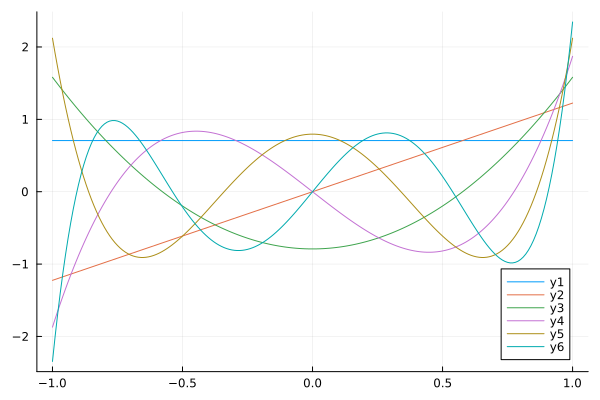

In [5]:
xs = collect(-1:0.01:1)

ys = (Pl.(xs, 0; norm = Val(:normalized)))
p = plot(xs, ys)
for i in 1:5
    ys =(Pl.(xs, i; norm = Val(:normalized)))
    plot!(p,xs, ys)
end
p

In [6]:
all([Pl(1,i; norm=Val(:normalized)) for i in 1:1000] .>= 0 )

true

In [7]:
encoding = legendre()

(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_splits_txt("datasets/ECG_train.txt", 
"datasets/ECG_val.txt", "datasets/ECG_test.txt");
X_train = vcat(X_train, X_val);
y_train = vcat(y_train, y_val);

scaler = fit_scaler(RobustSigmoidTransform, X_train);
erange = encoding.range
X_train_scaled = transform_data(scaler, X_train; range=erange)
X_train_scaled2 = transform_data(scaler, X_train; minmax_output=false, range=erange)

X_val_scaled = transform_data(scaler, X_val; range=erange)
X_test_scaled = transform_data(scaler, X_test; range=erange);

In [8]:
@show size(X_train_scaled), length(y_train)

(size(X_train_scaled), length(y_train)) = ((100, 96), 100)


((100, 96), 100)

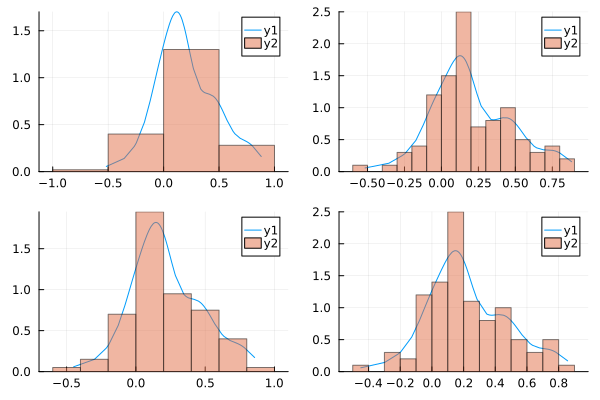

In [9]:
xs1 = sort(X_train_scaled[:,1])
xs2 = sort(X_train_scaled2[:,1])

kdense1_1 = kde(xs1;)
kdense1_2 = kde(xs1; bandwidth=0.08)


kdense2_1 = kde(xs2;)
kdense2_2 = kde(xs2; bandwidth=0.08)


ys1_1 = pdf(kdense1_1, xs1)
ys1_2 = pdf(kdense1_2, xs1)

ys2_1 = pdf(kdense2_1, xs2)
ys2_2 = pdf(kdense2_2, xs2)

p1_1 = plot(xs1, ys1_1)
histogram!(p1_1, xs1, alpha=0.5, norm=:pdf, bins=6)

p1_2= plot(xs1, ys1_2)
histogram!(p1_2, xs1, alpha=0.5, norm=:pdf, bins=15)



p2_1 = plot(xs2, ys2_1)
histogram!(p2_1, xs2, alpha=0.5, norm=:pdf, bins=6)

p2_2= plot(xs2, ys2_2)
histogram!(p2_2, xs2, alpha=0.5, norm=:pdf, bins=15)

plot(p1_1,p1_2, p2_1, p2_2; layout=(2,2))

In [12]:
xsd = sort(X_train_scaled[:,1])
kdense = kde(xsd; bandwidth=0.08)
xs = range(-1,1,200)
ys = pdf(kdense, xs)

wf = sqrt.(ys);

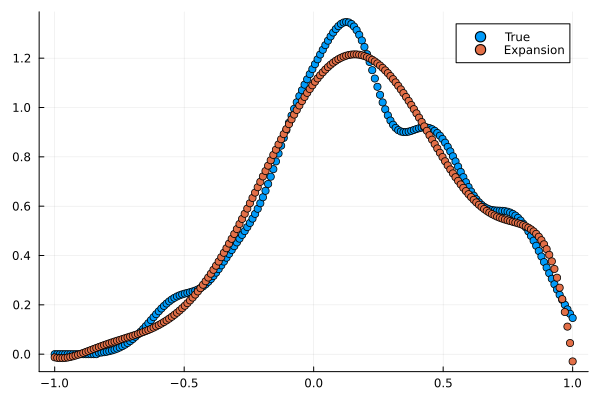

In [71]:
d = 8
nterms = 10*d

legfuncs = []
expansion = []
for i in 0:nterms-1
    ysi = Pl.(xs, i; norm = Val(:normalized))
    push!(legfuncs, ysi)
    problem = SampledIntegralProblem(wf .* ysi, xs)
    method = TrapezoidalRule()
    push!(expansion, solve(problem, method).u)
end

ysexp = zeros(length(ys))
ysappr = zeros(length(ys))

for (i,w) in enumerate(expansion)

    ysexp .+= w .* legfuncs[i]

end

inds = partialsortperm(abs2.(expansion), 1:d; rev=true)

for i in inds

    ysappr .+= expansion[i] .* legfuncs[i]

end


scatter(xs, wf; label="True")
#scatter!(xs, ysexp; label="Series")
scatter!(xs, ysappr; label="Expansion")


In [72]:
partialsortperm(abs2.(expansion), 1:1; rev=true)




1-element view(::Vector{Int64}, 1:1) with eltype Int64:
 1

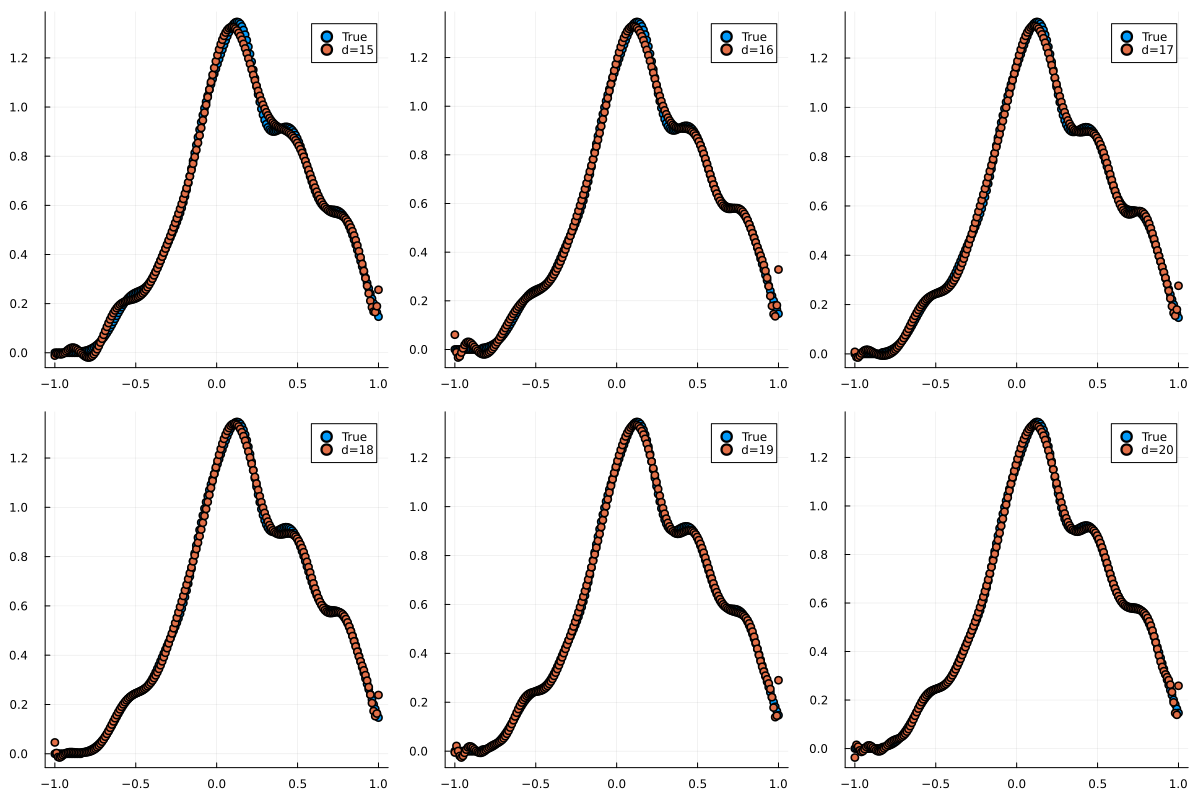

In [74]:
d = 8
nterms = 50#100*d

legfuncs = []
expansion = []
f = (x,l) -> Pl(x, l; norm=Val(:normalized))
for i in 0:nterms-1
    ysi = f.(xs, i)
    push!(legfuncs, ysi)
    problem = SampledIntegralProblem(wf .* ysi, xs)
    method = TrapezoidalRule()
    push!(expansion, solve(problem, method).u)
end

ysexp = zeros(length(ys))


# for (i,w) in enumerate(expansion)

#     ysexp .+= w .* legfuncs[i]

# end
ps = []
for d in 15:20
    ysappr = zeros(length(ys))
    inds = partialsortperm(abs2.(expansion), 1:d; rev=true)

    for i in inds

        ysappr .+= expansion[i] .* legfuncs[i]

    end



    p = scatter(xs, wf; label="True")
    scatter!(p, xs, ysappr; label="d=$d")
    push!(ps,p)
end

plot(ps..., size=(1200,800))


In [51]:


problem = SampledIntegralProblem(ys, xs)
method = TrapezoidalRule()
solve(problem, method)

retcode: Success
u: 0.9870014013154369

In [12]:
data = X_train_scaled[:,1]

y_data = sqrt(kde??) * PL

100-element Vector{Float64}:
 -0.2141544548310621
  0.47632277389242894
  0.2814981206389231
  0.09882137080968723
  0.2572187012256042
 -0.03098424993980864
  0.4905078272992083
 -0.44904925740945234
  0.0479966559594025
  0.38248191184129765
  ⋮
  0.5437470949456891
  0.22720492829653738
 -0.052137659307663564
  0.16051511767995374
  0.22095718662465047
  0.0538852557448084
  0.13327610881692764
  0.14338051625784431
  0.2079838219974357